<a href="https://colab.research.google.com/github/HalaShawky/Music-Analysis/blob/main/Music-Mood-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Throughout history, music and emotions have always been linked together, and music has always been part of how people express their feelings of sadness, happiness, hope, or excitement. Whether music can indeed influence the listener's emotions, or merely convey such emotion has been a point of debate for many years, however, the fact that both elements can be studied together is a subject many agree on. As technology advances, new methods of music analysis are being explored and refined, allowing us to have a better understanding of music and its emotional impact.

In this context, this project comes to explore and analyze the relationship of music to mood and the ability to predict mood through the features of music.

This project aims to create artificial intelligence models using features of music to analyze it and predict the resulting mood. Machine learning and data mining techniques will be used to analyze various musical features and determine the connection between them and the mood.

This project is expected to contribute to a better understanding of how can machine learning tools classify and predict listeners moods based on music features.

The dataset used in this project is obtained from Muharam, M. G. (2020). Spotify Music data to Identify the Moods (Version 1). Kaggle. https://www.kaggle.com/code/muhammadghazimuharam/music-mood-classification/input

# Business Understanding

Recently people have now been accustmed to recommendation systems in all sorts of media, like their online video and audio streaming services, their news feeds, and online retail options.

Our focus however will be on music subscription services that use recommendation systems to curate individual songs into personalized playlists according to a certain criteria, and in our case, it will be based on mood.

Our goal in this project is to build a predictive model that accurately categorizes music tracks into various moods.

This model can be used in the music recommendation systems that is utilized by many online music streaming applications.

# Data Understanding

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

This dataset uses the Spotify API for developers that makes use of their huge database of music for building interesting applications and studying people's music listening habits.

The columns are as follows:  
name: Name of the song  
album: Name of the album   
artist: Name of artist   
id:Spotify track id   
release date: Release date of the song (yyyy-mm-dd)   
popularity:  


In [50]:
url = 'https://raw.githubusercontent.com/HalaShawky/Music-Analysis/main/data_moods.csv?token=GHSAT0AAAAAACKVGEP4LY5P7DKPAHSSHFE4ZLTWLNA'
df = pd.read_csv(url)
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


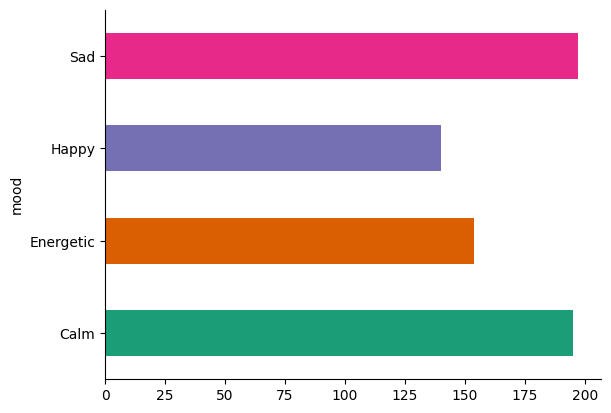

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('mood').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [52]:
column_headers = df.columns.values.tolist()
print("The Column Header :", column_headers)

The Column Header : ['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature', 'mood']


In [53]:
df2 = pd.unique(df['mood'].values.ravel())
print("Unique values in the 'mood' column:\n",df2)

Unique values in the 'mood' column:
 ['Happy' 'Sad' 'Energetic' 'Calm']


# Data Preparation

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [55]:
df.isnull().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

Modeling




In [56]:
modeldf = df

In [57]:
modeldf = modeldf.drop(['name', 'album','artist','id','release_date','popularity','length','time_signature'], axis=1)
modeldf.head()

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,mood
0,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,Happy
1,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,Sad
2,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,Sad
3,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,Happy
4,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,Energetic


In [58]:
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      686 non-null    float64
 1   acousticness      686 non-null    float64
 2   energy            686 non-null    float64
 3   instrumentalness  686 non-null    float64
 4   liveness          686 non-null    float64
 5   valence           686 non-null    float64
 6   loudness          686 non-null    float64
 7   speechiness       686 non-null    float64
 8   tempo             686 non-null    float64
 9   key               686 non-null    int64  
 10  mood              686 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 59.1+ KB


In [44]:
labels = df.pop('mood')

In [45]:
from sklearn.model_selection import train_test_split
# 'test_size' specifies the percentage of the data used for testing (here, 20%)
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2)
